### Analyzing Median Mortgage as a Percentage of Income
*Comparing individual and family incomes

In [1]:
import pandas as pd
import numpy as np
import altair as alt

In [2]:
file = pd.read_csv('ipums_clean.csv')

In [3]:
#Removing rows containing N/A from mortgage column (indicated by 0)
file = file[file.MORTAMT1 != 0]
len(file)

10597

In [4]:
#Removing rows containing  N/A's from individual income column (indicated by 9999999)
file = file[file.INCTOT != 9999999]
len(file)

8569

### (1) *Individual* Income 

In [5]:
indiv_inc_mort = pd.DataFrame()
for year in range(2006, 2018):
    df = file[file.YEAR == year]
    
    incomes = np.array([])
    for i, row in df[['INCTOT', 'PERWT']].iterrows():
        income = np.full(row.PERWT, row.INCTOT)
        incomes = np.append(incomes, income)
    inc = np.median(incomes)
    
    mortgages = np.array([])
    for i, row in df[['MORTAMT1', 'PERWT']].iterrows():
        mortgage = np.full(row.PERWT, row.MORTAMT1)
        mortgages = np.append(mortgages, mortgage)
    mort = np.median(mortgages)
    
    individual = {'Year':pd.Series(year), 'Indiv_Income':pd.Series(inc)/12, 'Mortgage':pd.Series(mort)}  #Indiv_Income divided by 12 to return monthly amount (like Mortgage)
    values = pd.DataFrame(individual)
    indiv_inc_mort = pd.concat([values, indiv_inc_mort])
    
indiv_inc_mort['Ratio'] = indiv_inc_mort.Mortgage / indiv_inc_mort.Indiv_Income
years = indiv_inc_mort.Year.astype('str')
indiv_inc_mort.Year = pd.to_datetime(years)

In [6]:
indiv_inc_mort

,Year,Indiv_Income,Mortgage,Ratio
0,2017-01-01,2250.000000,1700.0,0.755556
0,2016-01-01,2250.000000,1600.0,0.711111
0,2015-01-01,1750.000000,1500.0,0.857143
0,2014-01-01,2000.000000,1500.0,0.750000
0,2013-01-01,1666.666667,1400.0,0.840000
0,2012-01-01,1500.000000,1500.0,1.000000
0,2011-01-01,1500.000000,1600.0,1.066667
0,2010-01-01,1666.666667,1500.0,0.900000
0,2009-01-01,1666.666667,1600.0,0.960000
0,2008-01-01,1925.000000,1600.0,0.831169


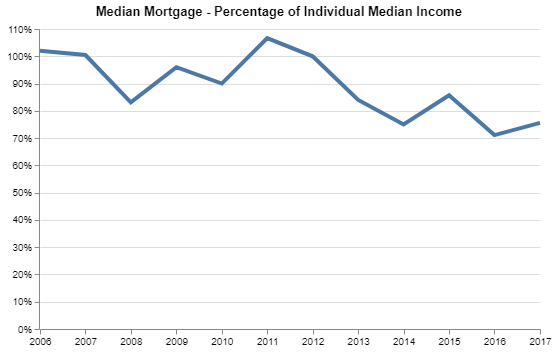

In [7]:
#Plotting data via Altair

alt.Chart(indiv_inc_mort).mark_line(strokeWidth=4).encode(
    x=alt.X('Year', axis=alt.Axis(grid=False, labelFlush=False), title=None), 
    y=alt.Y('Ratio', axis=alt.Axis(offset=1, format='%'), title=None)
).configure_view(
    strokeWidth=0
).properties(
title='Median Mortgage - Percentage of Individual Median Income', width=500)

### (2) *Family* Income 

In [8]:
fam_inc_mort = pd.DataFrame()
for year in range(2006, 2018):
    df = file[file.YEAR == year]
    
    incomes = np.array([])
    for i, row in df[['FTOTINC', 'PERWT']].iterrows():
        income = np.full(row.PERWT, row.FTOTINC)
        incomes = np.append(incomes, income)
    inc = np.median(incomes)
    
    mortgages = np.array([])
    for i, row in df[['MORTAMT1', 'PERWT']].iterrows():
        mortgage = np.full(row.PERWT, row.MORTAMT1)
        mortgages = np.append(mortgages, mortgage)
    mort = np.median(mortgages)
    
    family = {'Year':pd.Series(year), 'Fam_Income':pd.Series(inc)/12, 'Mortgage':pd.Series(mort)}  #Fam_Income divided by 12 to return monthly amount (consistent w/ Mortgage)
    values = pd.DataFrame(family)
    fam_inc_mort = pd.concat([values, fam_inc_mort])
    
fam_inc_mort['Ratio'] = fam_inc_mort.Mortgage / fam_inc_mort.Fam_Income
years = fam_inc_mort.Year.astype('str')
fam_inc_mort.Year = pd.to_datetime(years)

In [9]:
fam_inc_mort

,Year,Fam_Income,Mortgage,Ratio
0,2017-01-01,8433.333333,1700.0,0.201581
0,2016-01-01,7916.666667,1600.0,0.202105
0,2015-01-01,7983.333333,1500.0,0.187891
0,2014-01-01,8191.666667,1500.0,0.183113
0,2013-01-01,6666.666667,1400.0,0.210000
0,2012-01-01,6725.000000,1500.0,0.223048
0,2011-01-01,6500.000000,1600.0,0.246154
0,2010-01-01,5916.666667,1500.0,0.253521
0,2009-01-01,7250.000000,1600.0,0.220690
0,2008-01-01,6583.333333,1600.0,0.243038


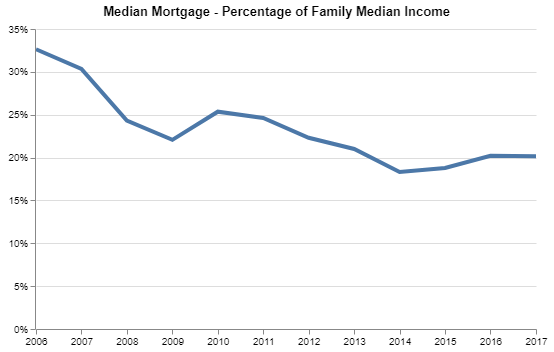

In [10]:
#Plotting data via Altair

alt.Chart(fam_inc_mort).mark_line(strokeWidth=4).encode(
    x=alt.X('Year', 
            axis=alt.Axis(grid=False, labelFlush=False), 
            title=None), 
    y=alt.Y('Ratio', 
            axis=alt.Axis(offset=1, format='%'), 
            title=None)
).configure_view(
    strokeWidth=0
).properties(
title='Median Mortgage - Percentage of Family Median Income', width=500)